In [500]:
"""
    Feature engineering in training data and building up the model
"""

'\n    Feature engineering in training data and building up the model\n'

In [252]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [253]:
# Finding the csv from the league
# Multi League directory
country = 'FR'
dirCountry = '../' + country + '/'
# csv to save
file_title = 'liguecopa_28.csv'
csv_file = dirCountry + file_title
df_one = pd.read_csv(csv_file)
file_title = 'ligue1_2020_1.csv'
csv_file = dirCountry + file_title
df_two = pd.read_csv(csv_file)

In [254]:
df_one = df_one.dropna(subset=['goals_home'])
print(df_one.shape)

(296, 125)


In [255]:
# Testing against current season
current_season = 2020

In [256]:
# Retrieving previous saved data
df_laliga = df_one.append(df_two)
df_laliga = df_laliga.drop(df_laliga.columns[0], axis=1)
df_laliga = df_laliga.drop(columns=["stats_home","stats_away"], axis=1)

In [257]:
print(df_laliga.shape)
df_laliga.head(5)

(676, 122)


,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.fouls,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,23.0,5.0,1.0,39%,6.0,NaN,3.0,263.0,172.0,65%
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,12.0,8.0,NaN,52%,1.0,NaN,1.0,418.0,338.0,81%
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,13.0,7.0,1.0,60%,2.0,NaN,1.0,467.0,386.0,83%
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,22.0,7.0,4.0,56%,5.0,NaN,2.0,385.0,312.0,81%
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,13.0,NaN,NaN,50%,2.0,NaN,3.0,395.0,321.0,81%


In [258]:
# None values set to 0
df_laliga.fillna(value=0, inplace=True)

In [259]:
# g_diff_home: an integer of the goals difference for home
df_laliga["g_diff_home"] = df_laliga["goals_home"] - df_laliga["goals_away"]
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,5.0,1.0,39%,6.0,0.0,3.0,263.0,172.0,65%,0.0
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,8.0,0.0,52%,1.0,0.0,1.0,418.0,338.0,81%,3.0
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,7.0,1.0,60%,2.0,0.0,1.0,467.0,386.0,83%,1.0
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,7.0,4.0,56%,5.0,0.0,2.0,385.0,312.0,81%,-1.0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,0.0,0.0,50%,2.0,0.0,3.0,395.0,321.0,81%,-2.0


In [260]:
# g_diff_away: an integer of the goals difference for away
df_laliga["g_diff_away"] = df_laliga["goals_away"] - df_laliga["goals_home"]
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,1.0,39%,6.0,0.0,3.0,263.0,172.0,65%,0.0,0.0
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,0.0,52%,1.0,0.0,1.0,418.0,338.0,81%,3.0,-3.0
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,1.0,60%,2.0,0.0,1.0,467.0,386.0,83%,1.0,-1.0
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,4.0,56%,5.0,0.0,2.0,385.0,312.0,81%,-1.0,1.0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,0.0,50%,2.0,0.0,3.0,395.0,321.0,81%,-2.0,2.0


In [261]:
# Set win as 1, draw as 0 and lose as -1
def get_status(r):
    goals_home = r["goals_fhome"] + r["goals_shome"]
    goals_away = r["goals_faway"] + r["goals_saway"]
    if goals_home > goals_away:
        return 1
    elif goals_home == goals_away:
        return 0
    else:
        return -1

In [262]:
def get_status(r):
    goals_home = r["goals_home"]
    goals_away = r["goals_away"]
    if goals_home > goals_away:
        return 1
    elif goals_home == goals_away:
        return 0
    else:
        return -1

In [263]:
"""
    Form: last 5 losses
        last 5 wins
        last 5 draws
"""
# Home
df_laliga["wins_home"] = df_laliga["team_home.form"].apply(lambda x: str(x).count('W'))
df_laliga["loses_home"] = df_laliga["team_home.form"].apply(lambda x: str(x).count('L'))
df_laliga["draws_home"] = df_laliga["team_home.form"].apply(lambda x: str(x).count('D'))
# Away
df_laliga["wins_away"] = df_laliga["team_away.form"].apply(lambda x: str(x).count('W'))
df_laliga["loses_away"] = df_laliga["team_away.form"].apply(lambda x: str(x).count('L'))
df_laliga["draws_away"] = df_laliga["team_away.form"].apply(lambda x: str(x).count('D'))

df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,172.0,65%,0.0,0.0,2,1,2,0,2,3
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,338.0,81%,3.0,-3.0,2,1,2,2,1,2
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,386.0,83%,1.0,-1.0,2,1,2,0,3,2
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,312.0,81%,-1.0,1.0,2,1,2,4,1,0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,321.0,81%,-2.0,2.0,2,1,2,3,1,1


In [264]:
# Promotion: either Champions, UEFA Europe, Second division
# Label encoder vs Normalize unicode encoder
description = np.unique(df_laliga["team_home.description"].astype(str))
description = np.append(description, np.unique(df_laliga["team_away.description"].astype(str)))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.description"] = enc.transform(df_laliga["team_home.description"].astype(str))
df_laliga["team_away.description"] = enc.transform(df_laliga["team_away.description"].astype(str))
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,172.0,65%,0.0,0.0,2,1,2,0,2,3
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,338.0,81%,3.0,-3.0,2,1,2,2,1,2
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,386.0,83%,1.0,-1.0,2,1,2,0,3,2
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,312.0,81%,-1.0,1.0,2,1,2,4,1,0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,321.0,81%,-2.0,2.0,2,1,2,3,1,1


In [265]:
# Group: conference west vs east
description = np.unique(df_laliga["team_home.group"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.group"] = enc.transform(df_laliga["team_home.group"].astype(str))
df_laliga["team_away.group"] = enc.transform(df_laliga["team_away.group"].astype(str))
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,172.0,65%,0.0,0.0,2,1,2,0,2,3
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,338.0,81%,3.0,-3.0,2,1,2,2,1,2
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,386.0,83%,1.0,-1.0,2,1,2,0,3,2
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,312.0,81%,-1.0,1.0,2,1,2,4,1,0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,321.0,81%,-2.0,2.0,2,1,2,3,1,1


In [266]:
def score_home(best):
    if best != 0:
        return int(best[0]) - int(best[2])
    return best

In [267]:
def score_away(best):
    if best != 0:
        return int(best[2]) - int(best[0])
    return best

In [268]:
# For best_lose
df_laliga["team_away.stats_home.streaks.best_lose"] = df_laliga["team_away.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_lose"] = df_laliga["team_away.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_away.stats_home.streaks.best_win"] = df_laliga["team_away.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_win"] = df_laliga["team_away.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,172.0,65%,0.0,0.0,2,1,2,0,2,3
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,338.0,81%,3.0,-3.0,2,1,2,2,1,2
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,386.0,83%,1.0,-1.0,2,1,2,0,3,2
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,312.0,81%,-1.0,1.0,2,1,2,4,1,0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,321.0,81%,-2.0,2.0,2,1,2,3,1,1


In [269]:
# For best_lose
df_laliga["team_home.stats_home.streaks.best_lose"] = df_laliga["team_home.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_lose"] = df_laliga["team_home.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_home.stats_home.streaks.best_win"] = df_laliga["team_home.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_win"] = df_laliga["team_home.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,172.0,65%,0.0,0.0,2,1,2,0,2,3
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,338.0,81%,3.0,-3.0,2,1,2,2,1,2
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,386.0,83%,1.0,-1.0,2,1,2,0,3,2
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,312.0,81%,-1.0,1.0,2,1,2,4,1,0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,321.0,81%,-2.0,2.0,2,1,2,3,1,1


In [270]:
# Posession % to decimal as p_percentage
df_laliga["stats_away.p_percentage"] = df_laliga["stats_away.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.p_percentage"] = df_laliga["stats_home.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_away.possession"] = df_laliga["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.possession"] = df_laliga["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,172.0,0.65,0.0,0.0,2,1,2,0,2,3
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,338.0,0.81,3.0,-3.0,2,1,2,2,1,2
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,386.0,0.83,1.0,-1.0,2,1,2,0,3,2
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,312.0,0.81,-1.0,1.0,2,1,2,4,1,0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,321.0,0.81,-2.0,2.0,2,1,2,3,1,1


In [271]:
"""
    Following this premise:
    - Away standings from home team aren't relevant
    - Home standings from away team aren't relevant
"""
# Drop away standings
df_premise = df_laliga.drop(df_laliga.filter(regex='team_away.stats_home.').columns, axis=1)
df_premise = df_laliga.drop(df_laliga.filter(regex='team_home.stats_away.').columns, axis=1)
print(df_premise.shape)
df_premise.head()

(676, 113)


,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,26,0.0,0.0,61,2019,95,Strasbourg,11,38,...,172.0,0.65,0.0,0.0,2,1,2,0,2,3
1,157652,24,3.0,0.0,61,2019,95,Strasbourg,11,38,...,338.0,0.81,3.0,-3.0,2,1,2,2,1,2
2,157596,19,2.0,1.0,61,2019,95,Strasbourg,11,38,...,386.0,0.83,1.0,-1.0,2,1,2,0,3,2
4,157629,22,1.0,2.0,61,2019,95,Strasbourg,11,38,...,312.0,0.81,-1.0,1.0,2,1,2,4,1,0
5,157441,3,0.0,2.0,61,2019,95,Strasbourg,11,38,...,321.0,0.81,-2.0,2.0,2,1,2,3,1,1


In [272]:
"""
    Here the unseen data will be built as test set - Liga Mx
"""
p37 = [[80, 89], [116, 85], [106, 81], [77, 78], [112, 91], [83, 92], 
       [1063, 97], [94, 82], [93, 79], [95, 84]]

In [273]:
# Getting previous record
weeks = [2]
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1]) & (df_laliga["week"].isin(weeks))])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1]) & (df_premise["week"].isin(weeks))])
ts_premise.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
131,571482,2,0.0,1.0,61,2020,80,Lyon,16,0,...,100.0,0.74,-1.0,1.0,0,0,0,0,1,0
102,571483,2,0.0,0.0,61,2020,116,Lens,17,0,...,0.0,0.00,0.0,0.0,0,1,0,0,0,0
201,571484,2,0.0,0.0,61,2020,106,Stade Brestois 29,20,0,...,0.0,0.00,0.0,0.0,0,1,0,0,0,0
287,571485,2,0.0,0.0,61,2020,77,Angers,4,3,...,0.0,0.00,0.0,0.0,1,0,0,0,0,1
253,571486,2,0.0,0.0,61,2020,112,Metz,11,0,...,0.0,0.00,0.0,0.0,0,0,0,0,0,1


In [274]:
print(ts_laliga.shape)
print(ts_premise.shape)

(10, 130)
(10, 113)


In [275]:
# Remove categorical values as team_away and team_home names, team_home.form
df_laliga = df_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
df_laliga.head()
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

(676, 126)


In [276]:
# Auxiliar for team names
ts_name = pd.DataFrame()
ts_name["team_home.team.name"] = ts_laliga["team_home.team.name"]
ts_name["team_away.team.name"] = ts_laliga["team_away.team.name"]
ts_laliga = ts_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
ts_premise = ts_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

In [277]:
# This is done before training, after building testing
#for match in p37:
    #df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    #df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
for match in p37:
    df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
print(df_laliga.shape)
print(df_premise.shape)

(645, 126)
(645, 109)


In [278]:
# Remove all games that hasn't being played
for match in p37:
    df_laliga = df_laliga[(df_laliga["stats_home.p_percentage"]!=np.float32(0))]
    df_premise = df_premise[(df_premise["stats_home.p_percentage"]!=np.float32(0))]
print(df_laliga.shape)
print(df_premise.shape)

(289, 126)
(289, 109)


In [279]:
# status_home: either win, draw or lose for home team, predicted label
label = []
for index, row in df_laliga.iterrows():
    label.append(get_status(row))
print(label)

[0, 1, 1, -1, -1, 1, 1, 0, 0, -1, 1, 1, -1, 0, 0, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 0, 1, 0, 1, -1, 0, -1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, -1, 0, -1, -1, 1, 1, 1, 1, 0, 0, -1, 1, -1, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, -1, 0, 1, 0, 1, -1, -1, 1, -1, -1, -1, 0, 1, 1, 1, -1, 0, 1, 1, -1, -1, 0, 1, -1, 0, 1, 1, 0, 0, 1, 1, 1, 1, -1, 0, 1, -1, 1, 0, 1, 1, -1, 1, 1, 1, 1, -1, 0, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 0, 0, 1, 0, 1, -1, -1, 0, 0, 1, 1, 0, -1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, -1, -1, 0, 1, 1, 1, -1, 0, -1, -1, 1, 0, 0, -1, 0, 0, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 0, 1, 1, 1, 1, 1, -1, -1, 1, 0, 0, -1, -1, 1, 1, -1, -1, 0, 1, 1, 1, 0, 1, -1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 0, 1, 1, 1, 1, 0, -1, 1, 1, 1, 1, 1, -1, -1, 0, 0, 1, 0, 1, 1, 0, -1, 0, 1, -1, -1, 1, 0, -1, 1, 1, 0, 1, 1, 1, -1, 1, 1, 0, -1, 1, 1, 1, -1, 0, 1, 0, 1, 0]


In [280]:
# Here the clean dataset to study in tableau
df_tableau = df_laliga.copy()
df_tableau["result"] = label
# csv to save
file_title = 'clean_ligue1_p2.csv'
results_file = '../' + 'Tableau' + '/' + file_title
df_tableau.to_csv(results_file)

In [281]:
# Missing linear regression for goals_home and goals_away, as goal_diff
df_laliga = df_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_laliga = ts_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_premise = ts_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])

(289, 122)


In [282]:
# La liga
# GET avg for team_home.stats_home. team_home.stats_away. team_away.stats_home. team_away.stats_away.
columns_home = df_laliga.filter(regex='^stats_home').columns
#columns_g_home = df_laliga.filter(["goals_home","g_diff_home"]).columns
#columns_home = columns_home.append(columns_g_home)
#avg_home_laliga = df_laliga.groupby(['team_home.team.id'], as_index=True)[columns_home].mean()
avg_home_laliga = df_laliga.groupby(['team_home.team.id','season'], as_index=True)[columns_home].mean()
avg_home_laliga.head()

stats_home.s_on_g  stats_home.s_off_g  \
team_home.team.id season                                          
77                2019             4.941176            6.000000   
78                2019             4.724138            4.655172   
                  2020             1.000000            4.000000   
79                2019             5.166667            5.416667   
                  2020             1.000000            4.000000   

                          stats_home.s_in  stats_home.s_out  \
team_home.team.id season                                      
77                2019          15.176471          4.235294   
78                2019          11.827586          2.448276   
                  2020           5.000000          0.000000   
79                2019          12.833333          2.250000   
                  2020           5.000000          0.000000   

                          stats_home.s_total  stats_home.s_blocked  \
team_home.team.id season                                             
77                2019              8.235294              6.941176   
78                2019              6.827586              5.000000   
                  2020              1.000000              4.000000   
79                2019              7.750000              5.083333   
                  2020              1.000000              4.000000   

                          stats_home.fouls  stats_home.corners  \
team_home.team.id season                                         
77                2019           11.352941            5.176471   
78                2019           12.413793            4.517241   
                  2020           10.000000            2.000000   
79                2019           14.000000            4.916667   
                  2020           12.000000            4.000000   

                          stats_home.offside  stats_home.possession  \
team_home.team.id season                                              
77                2019              0.764706               0.502941   
78                2019              1.517241               0.523103   
                  2020              0.000000               0.430000   
79                2019              1.500000               0.510833   
                  2020              0.000000               0.510000   

                          stats_home.c_yellow  stats_home.c_red  \
team_home.team.id season                                          
77                2019               1.588235          0.117647   
78                2019               1.724138          0.068966   
                  2020               2.000000          1.000000   
79                2019               1.250000          0.000000   
                  2020               0.000000          1.000000   

                          stats_home.saves  stats_home.p_total  \
team_home.team.id season                                         
77                2019            2.470588          471.823529   
78                2019            2.931034          492.379310   
                  2020            1.000000          483.000000   
79                2019            2.833333          448.166667   
                  2020            2.000000          501.000000   

                          stats_home.p_accurate  stats_home.p_percentage  
team_home.team.id season                                                  
77                2019               389.941176                 0.820000  
78                2019               409.206897                 0.820000  
                  2020               399.000000                 0.830000  
79                2019               359.250000                 0.794167  
                  2020               421.000000                 0.840000

In [283]:
try:
    p = avg_home_laliga.index.values
    b = list(zip(*p))
    avg_home_laliga.insert(0, column="home_team_id",value = b[0])
    avg_home_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [284]:
avg_home_laliga.head()

home_team_id  stats_home.s_on_g  stats_home.s_off_g  \
team_home.team.id season                                                        
77                2019              77           4.941176            6.000000   
78                2019              78           4.724138            4.655172   
                  2020              78           1.000000            4.000000   
79                2019              79           5.166667            5.416667   
                  2020              79           1.000000            4.000000   

                          stats_home.s_in  stats_home.s_out  \
team_home.team.id season                                      
77                2019          15.176471          4.235294   
78                2019          11.827586          2.448276   
                  2020           5.000000          0.000000   
79                2019          12.833333          2.250000   
                  2020           5.000000          0.000000   

                          stats_home.s_total  stats_home.s_blocked  \
team_home.team.id season                                             
77                2019              8.235294              6.941176   
78                2019              6.827586              5.000000   
                  2020              1.000000              4.000000   
79                2019              7.750000              5.083333   
                  2020              1.000000              4.000000   

                          stats_home.fouls  stats_home.corners  \
team_home.team.id season                                         
77                2019           11.352941            5.176471   
78                2019           12.413793            4.517241   
                  2020           10.000000            2.000000   
79                2019           14.000000            4.916667   
                  2020           12.000000            4.000000   

                          stats_home.offside  stats_home.possession  \
team_home.team.id season                                              
77                2019              0.764706               0.502941   
78                2019              1.517241               0.523103   
                  2020              0.000000               0.430000   
79                2019              1.500000               0.510833   
                  2020              0.000000               0.510000   

                          stats_home.c_yellow  stats_home.c_red  \
team_home.team.id season                                          
77                2019               1.588235          0.117647   
78                2019               1.724138          0.068966   
                  2020               2.000000          1.000000   
79                2019               1.250000          0.000000   
                  2020               0.000000          1.000000   

                          stats_home.saves  stats_home.p_total  \
team_home.team.id season                                         
77                2019            2.470588          471.823529   
78                2019            2.931034          492.379310   
                  2020            1.000000          483.000000   
79                2019            2.833333          448.166667   
                  2020            2.000000          501.000000   

                          stats_home.p_accurate  stats_home.p_percentage  
team_home.team.id season                                                  
77                2019               389.941176                 0.820000  
78                2019               409.206897                 0.820000  
                  2020               399.000000                 0.830000  
79                2019               359.250000                 0.794167  
                  2020               421.000000                 0.840000

In [285]:
columns_away = df_laliga.filter(regex='^stats_away').columns
#columns_g_away = df_laliga.filter(["goals_away","g_diff_away"]).columns
#columns_away = columns_home.append(columns_g_away)
#avg_away_laliga = df_laliga.groupby(['team_away.team.id'], as_index=True)[columns_away].mean()
avg_away_laliga = df_laliga.groupby(['team_away.team.id','season'], as_index=True)[columns_away].mean()
avg_away_laliga.head(10)

stats_away.s_on_g  stats_away.s_off_g  \
team_away.team.id season                                          
77                2019             3.285714            5.714286   
                  2020             4.000000            6.000000   
78                2019             3.857143            4.428571   
79                2019             4.285714            4.142857   
80                2019             4.733333            5.466667   
81                2019             3.642857            5.285714   
82                2019             2.461538            4.615385   
83                2019             3.571429            5.000000   
                  2020             1.000000            3.000000   
84                2019             4.363636            4.090909   

                          stats_away.s_in  stats_away.s_out  \
team_away.team.id season                                      
77                2019          11.428571          2.428571   
                  2020          13.000000          3.000000   
78                2019          10.928571          2.642857   
79                2019          10.714286          2.285714   
80                2019          13.133333          2.933333   
81                2019          11.285714          2.357143   
82                2019           9.153846          2.076923   
83                2019          11.357143          2.785714   
                  2020           6.000000          2.000000   
84                2019          11.363636          2.909091   

                          stats_away.s_total  stats_away.s_blocked  \
team_away.team.id season                                             
77                2019              6.071429              5.357143   
                  2020             10.000000              3.000000   
78                2019              5.357143              5.571429   
79                2019              6.642857              4.071429   
80                2019              7.133333              6.000000   
81                2019              6.428571              4.857143   
82                2019              5.230769              3.923077   
83                2019              5.642857              5.714286   
                  2020              0.000000              6.000000   
84                2019              6.181818              5.181818   

                          stats_away.fouls  stats_away.corners  \
team_away.team.id season                                         
77                2019           12.214286            4.785714   
                  2020            8.000000            9.000000   
78                2019           13.928571            4.785714   
79                2019           13.857143            5.642857   
80                2019           12.466667            4.066667   
81                2019           13.428571            4.857143   
82                2019           14.538462            4.384615   
83                2019           13.785714            5.142857   
                  2020           15.000000            3.000000   
84                2019           11.363636            3.909091   

                          stats_away.offside  stats_away.possession  \
team_away.team.id season                                              
77                2019              0.928571               0.436429   
                  2020              0.000000               0.470000   
78                2019              1.714286               0.545714   
79                2019              2.000000               0.502857   
80                2019              1.133333               0.559333   
81                2019              0.928571               0.525000   
82                2019              1.692308               0.476154   
83                2019              1.428571               0.455000   
                  2020              3.000000               0.570000   
84                2019              0.818182     

In [286]:
try:
    p = avg_away_laliga.index.values
    b = list(zip(*p))
    avg_away_laliga.insert(0, column="away_team_id",value = b[0])
    avg_away_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [287]:
i_th = ts_laliga.columns.get_loc("team_home.team.id")
i_ta = ts_laliga.columns.get_loc("team_away.team.id")
for i in range(len(ts_laliga)):
    for index, row in avg_home_laliga.iterrows():
        # getting just current season
        if ts_laliga.iloc[i,i_th] == index[0] and index[1] == current_season:
            for c in columns_home:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_laliga)):
    for index, row in avg_away_laliga.iterrows():
        if ts_laliga.iloc[i,i_ta] == index[0] and index[1] == current_season:
            for c in columns_away:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_laliga.head(10)

,id,week,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
131,571482,2,61,2020,80,16,0,0,0,0,...,3.0,135.0,100.0,0.74,0,0,0,0,1,0
102,571483,2,61,2020,116,17,0,-1,0,0,...,0.0,0.0,0.0,0.00,0,1,0,0,0,0
201,571484,2,61,2020,106,20,0,-4,6,0,...,0.0,0.0,0.0,0.00,0,1,0,0,0,0
287,571485,2,61,2020,77,4,3,1,5,0,...,0.0,0.0,0.0,0.00,1,0,0,0,0,1
253,571486,2,61,2020,112,11,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,0,0,0,1
267,571487,2,61,2020,83,10,1,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,1,0,0
183,571488,2,61,2020,1063,13,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,0,1,0,0
60,571489,2,61,2020,94,8,1,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,0,0,0
56,571490,2,61,2020,93,6,1,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,0,0,1
9,571491,2,61,2020,95,19,0,-2,6,0,...,0.0,0.0,0.0,0.00,0,1,0,1,0,0


In [288]:
# Premise
# GET avg for team_home.stats_home. team_away.stats_away.
i_th = ts_premise.columns.get_loc("team_home.team.id")
i_ta = ts_premise.columns.get_loc("team_away.team.id")
for i in range(len(ts_premise)):
    for index, row in avg_home_laliga.iterrows():
        if ts_premise.iloc[i,i_th] == index[0] and index[1] == current_season:
            for c in columns_home:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_premise)):
    for index, row in avg_away_laliga.iterrows():
        if ts_premise.iloc[i,i_ta] == index[0] and index[1] == current_season:
            for c in columns_away:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_premise.head(10)

,id,week,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
131,571482,2,61,2020,80,16,0,0,0,0,...,3.0,135.0,100.0,0.74,0,0,0,0,1,0
102,571483,2,61,2020,116,17,0,-1,0,0,...,0.0,0.0,0.0,0.00,0,1,0,0,0,0
201,571484,2,61,2020,106,20,0,-4,6,0,...,0.0,0.0,0.0,0.00,0,1,0,0,0,0
287,571485,2,61,2020,77,4,3,1,5,0,...,0.0,0.0,0.0,0.00,1,0,0,0,0,1
253,571486,2,61,2020,112,11,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,0,0,0,1
267,571487,2,61,2020,83,10,1,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,1,0,0
183,571488,2,61,2020,1063,13,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,0,1,0,0
60,571489,2,61,2020,94,8,1,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,0,0,0
56,571490,2,61,2020,93,6,1,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,0,0,1
9,571491,2,61,2020,95,19,0,-2,6,0,...,0.0,0.0,0.0,0.00,0,1,0,1,0,0


In [289]:
# Drop ids
df_laliga = df_laliga.drop(columns=["team_home.group","team_away.group", 
                                    "team_away.stats_away.played", "team_away.stats_home.played",
                                    "team_home.stats_away.played", "team_home.stats_home.played", "week"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.group","team_away.group",
                                      "team_away.stats_away.played","team_home.stats_home.played", "week"])

(289, 115)


In [290]:
ts_laliga = ts_laliga.drop(columns=["team_home.group","team_away.group",
                                    "team_away.stats_away.played", "team_away.stats_home.played",
                                    "team_home.stats_away.played", "team_home.stats_home.played",
                                   "week"])
ts_premise = ts_premise.drop(columns=["team_home.group","team_away.group",
                                      "team_away.stats_away.played", "team_home.stats_home.played",
                                     "week"])

In [291]:
"""
    Three algorithms:
        - SVM
        - PCA
        - Naive Bayes
    To train, both: premise and regular data
"""

'\n    Three algorithms:\n        - SVM\n        - PCA\n        - Naive Bayes\n    To train, both: premise and regular data\n'

In [292]:
results_laliga = ts_laliga.copy()
results_premise = ts_premise.copy()

In [293]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [294]:
# For PCA teams' ids will be removed
pca_laliga = df_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_premise = df_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_laliga = ts_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_premise = ts_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)

In [295]:
# Standardizing the features
pca_laliga = StandardScaler().fit_transform(pca_laliga)
#pca_laliga = normalize(pca_laliga) 
pca_premise = StandardScaler().fit_transform(pca_premise)
#pca_premise = normalize(pca_premise) 
pca_test_laliga = StandardScaler().fit_transform(pca_test_laliga)
#pca_test_laliga = normalize(pca_test_laliga) 
pca_test_premise = StandardScaler().fit_transform(pca_test_premise)
#pca_test_premise= normalize(pca_test_premise) 
# Performs pca to reduce to 10 components
pca_fi = PCA(n_components=9)
pca_laliga_fi = pca_fi.fit_transform(pca_laliga)
pca_premise_fi = pca_fi.fit_transform(pca_premise)
pca_test_laliga_fi = pca_fi.fit_transform(pca_test_laliga)
pca_test_premise_fi = pca_fi.fit_transform(pca_test_premise)
# Performs pca to reduce to 5 components
pca_tw = PCA(n_components=5)
pca_laliga_tw = pca_tw.fit_transform(pca_laliga)
pca_premise_tw = pca_tw.fit_transform(pca_premise)
pca_test_laliga_tw = pca_tw.fit_transform(pca_test_laliga)
pca_test_premise_tw = pca_tw.fit_transform(pca_test_premise)

In [296]:
# Understanding PCA
ex_variance=np.var(pca_premise_fi,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.28837595 0.16940085 0.15193799 0.09354709 0.07136195 0.06349487
 0.05849226 0.05749656 0.0458925 ]


In [297]:
# Select two components
ex_variance=np.var(pca_premise_tw,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.3722787  0.21868789 0.19614423 0.12076454 0.09212465]


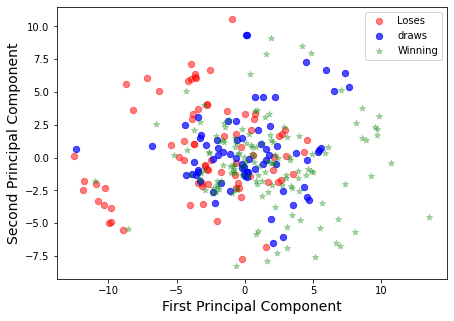

In [233]:
Xax=pca_premise_tw[:,0]
Yax=pca_premise_tw[:,1]
#labels=cancer.target
cdict={-1:'red',1:'green', 0:'blue'}
labl={1:'Winning',-1:'Loses', 0:'draws'}
marker={1:'*',-1:'o', 0:'o'}
alpha={1:.3, -1:.5, 0:.7}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(label):
    ix = np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


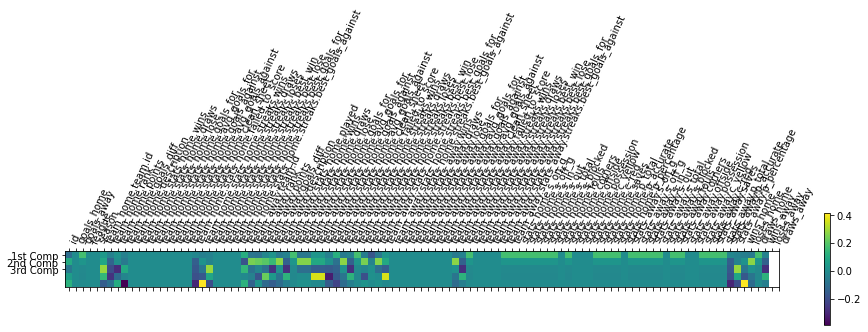

In [234]:
feature_names = df_premise.columns
plt.matshow(pca_tw.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [298]:
# SVM algorithm, using premise
from sklearn.svm import SVC
sv_p = SVC(gamma='auto', probability=True)
sv_p.fit(pca_premise, label)
results_premise["svm"] = sv_p.predict(pca_test_premise)
results_premise.head()

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
131,571482,61,2020,80,16,0,0,0,0,0,...,135.0,100.0,0.74,0,0,0,0,1,0,1
102,571483,61,2020,116,17,0,-1,0,0,0,...,0.0,0.0,0.00,0,1,0,0,0,0,1
201,571484,61,2020,106,20,0,-4,6,0,0,...,0.0,0.0,0.00,0,1,0,0,0,0,1
287,571485,61,2020,77,4,3,1,5,0,0,...,0.0,0.0,0.00,1,0,0,0,0,1,1
253,571486,61,2020,112,11,0,0,0,0,0,...,0.0,0.0,0.00,0,0,0,0,0,1,1


In [299]:
print(results_premise["svm"])

131    1
102    1
201    1
287    1
253    1
267    1
183    1
60     1
56     1
9      1
Name: svm, dtype: int64


In [300]:
# SVM, Not using premise
sv = SVC(gamma='auto')
sv.fit(pca_laliga, label)
results_laliga["svm"] = sv.predict(pca_test_laliga)
results_laliga.head()

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
131,571482,61,2020,80,16,0,0,0,0,0,...,135.0,100.0,0.74,0,0,0,0,1,0,1
102,571483,61,2020,116,17,0,-1,0,0,0,...,0.0,0.0,0.00,0,1,0,0,0,0,1
201,571484,61,2020,106,20,0,-4,6,0,0,...,0.0,0.0,0.00,0,1,0,0,0,0,1
287,571485,61,2020,77,4,3,1,5,0,0,...,0.0,0.0,0.00,1,0,0,0,0,1,1
253,571486,61,2020,112,11,0,0,0,0,0,...,0.0,0.0,0.00,0,0,0,0,0,1,1


In [301]:
print(results_laliga["svm"])

131    1
102    1
201    1
287    1
253    1
267    1
183    1
60     1
56     1
9      1
Name: svm, dtype: int64


In [302]:
# SVM using premise with PCA
sv_p_fi = SVC(gamma='auto')
sv_p_fi.fit(pca_premise_fi, label)
results_premise["svm_pca_fi"] = sv_p_fi.predict(pca_test_premise_fi)
print(results_premise["svm_pca_fi"])
sv_p_tw = SVC(gamma='auto')
sv_p_tw.fit(pca_premise_tw, label)
results_premise["svm_pca_tw"] = sv_p_tw.predict(pca_test_premise_tw)
print(results_premise["svm_pca_tw"])

131    1
102    1
201    1
287    1
253    1
267    1
183    1
60     1
56     1
9      1
Name: svm_pca_fi, dtype: int64
131    1
102    1
201    1
287    1
253    1
267    1
183    1
60     1
56     1
9      1
Name: svm_pca_tw, dtype: int64


In [303]:
# SVM, Not using premise with PCA
sv_fi = SVC(gamma='auto')
sv_fi.fit(pca_laliga_fi, label)
results_laliga["svm_pca_fi"] = sv_fi.predict(pca_test_laliga_fi)
print(results_laliga["svm_pca_fi"])
sv_tw = SVC(gamma='auto')
sv_tw.fit(pca_laliga_tw, label)
results_laliga["svm_pca_tw"] = sv_tw.predict(pca_test_laliga_tw)
print(results_laliga["svm_pca_tw"])

131    1
102    1
201    1
287    1
253    1
267    1
183    1
60     1
56     1
9      1
Name: svm_pca_fi, dtype: int64
131    1
102    1
201    1
287    1
253    1
267    1
183    1
60     1
56     1
9      1
Name: svm_pca_tw, dtype: int64


In [304]:
df_premise.head()

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,61,2019,95,11,38,0,0,7,3,...,3.0,263.0,172.0,0.65,2,1,2,0,2,3
1,157652,61,2019,95,11,38,0,0,7,3,...,1.0,418.0,338.0,0.81,2,1,2,2,1,2
2,157596,61,2019,95,11,38,0,0,7,3,...,1.0,467.0,386.0,0.83,2,1,2,0,3,2
4,157629,61,2019,95,11,38,0,0,7,3,...,2.0,385.0,312.0,0.81,2,1,2,4,1,0
5,157441,61,2019,95,11,38,0,0,7,3,...,3.0,395.0,321.0,0.81,2,1,2,3,1,1


In [305]:
# Naive Bayes, using premise
from sklearn.naive_bayes import GaussianNB
gnb_p = GaussianNB()
gnb_p.fit(df_premise, label)
results_premise["nb"] = gnb_p.predict(ts_premise)

In [306]:
# Regular NB
gnb = GaussianNB()
gnb_p.fit(df_laliga, label)
results_laliga["nb"] = gnb_p.predict(ts_laliga)
results_laliga.head()

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb
131,571482,61,2020,80,16,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
102,571483,61,2020,116,17,0,-1,0,0,0,...,0,1,0,0,0,0,1,1,1,0
201,571484,61,2020,106,20,0,-4,6,0,0,...,0,1,0,0,0,0,1,1,1,0
287,571485,61,2020,77,4,3,1,5,0,0,...,1,0,0,0,0,1,1,1,1,0
253,571486,61,2020,112,11,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0


In [307]:
# Add ids # NO EN PCA
pca_laliga_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_laliga_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_premise_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_premise_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_test_laliga_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_laliga_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values
pca_test_premise_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_premise_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [308]:
# NB using premise with PCA
gnb_p_fi = GaussianNB()
gnb_p_fi.fit(pca_premise_fi, label)
results_premise["nb_pca_fi"] = gnb_p_fi.predict(pca_test_premise_fi)
gnb_p_tw = GaussianNB()
gnb_p_tw.fit(pca_premise_tw, label)
results_premise["nb_pca_tw"] = gnb_p_tw.predict(pca_test_premise_tw)
results_premise.head(10)

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
131,571482,61,2020,80,16,0,0,0,0,0,...,0,0,1,0,1,1,1,0,1,1
102,571483,61,2020,116,17,0,-1,0,0,0,...,0,0,0,0,1,1,1,0,1,1
201,571484,61,2020,106,20,0,-4,6,0,0,...,0,0,0,0,1,1,1,0,1,1
287,571485,61,2020,77,4,3,1,5,0,0,...,0,0,0,1,1,1,1,0,1,1
253,571486,61,2020,112,11,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,1
267,571487,61,2020,83,10,1,0,0,0,0,...,1,1,0,0,1,1,1,0,-1,-1
183,571488,61,2020,1063,13,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,-1
60,571489,61,2020,94,8,1,0,0,0,0,...,1,0,0,0,1,1,1,0,1,1
56,571490,61,2020,93,6,1,0,0,0,0,...,1,0,0,1,1,1,1,0,1,1
9,571491,61,2020,95,19,0,-2,6,0,0,...,0,1,0,0,1,1,1,0,1,1


In [309]:
# NB, Not using premise with PCA
gnb_fi = GaussianNB()
gnb_fi.fit(pca_laliga_fi, label)
results_laliga["nb_pca_fi"] = gnb_fi.predict(pca_test_laliga_fi)
gnb_tw = GaussianNB()
gnb_tw.fit(pca_laliga_tw, label)
results_laliga["nb_pca_tw"] = gnb_tw.predict(pca_test_laliga_tw)
results_laliga.head()

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
131,571482,61,2020,80,16,0,0,0,0,0,...,0,0,1,0,1,1,1,0,1,1
102,571483,61,2020,116,17,0,-1,0,0,0,...,0,0,0,0,1,1,1,0,1,1
201,571484,61,2020,106,20,0,-4,6,0,0,...,0,0,0,0,1,1,1,0,0,1
287,571485,61,2020,77,4,3,1,5,0,0,...,0,0,0,1,1,1,1,0,-1,-1
253,571486,61,2020,112,11,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,1


In [310]:
"""
    Feature Selection:
    Test against ANOVA f-score
"""

'\n    Feature Selection:\n    Test against ANOVA f-score\n'

In [311]:
from sklearn.feature_selection import SelectKBest, f_classif

In [312]:
# Using ANOVA f-score
best_features_premise = SelectKBest(f_classif, k=20).fit(df_premise, label)
best_features = SelectKBest(f_classif, k=20).fit(df_laliga, label)
df_chi = best_features.transform(df_laliga)
premise_chi = best_features_premise.transform(df_premise)
ts_chi = best_features.transform(ts_laliga)
ts_premise_chi = best_features_premise.transform(ts_premise)

In [313]:
# Using Gaussian Naive Bayes and chi-squared
gnb_p_chi = GaussianNB()
gnb_p_chi.fit(premise_chi, label)
results_premise["nb_fval"] = gnb_p_chi.predict(ts_premise_chi)
gnb_chi = GaussianNB()
gnb_chi.fit(df_chi, label)
results_laliga["nb_fval"] = gnb_chi.predict(ts_chi)
results_premise.head(10)

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval
131,571482,61,2020,80,16,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
102,571483,61,2020,116,17,0,-1,0,0,0,...,0,0,0,1,1,1,0,1,1,0
201,571484,61,2020,106,20,0,-4,6,0,0,...,0,0,0,1,1,1,0,1,1,0
287,571485,61,2020,77,4,3,1,5,0,0,...,0,0,1,1,1,1,0,1,1,0
253,571486,61,2020,112,11,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,0
267,571487,61,2020,83,10,1,0,0,0,0,...,1,0,0,1,1,1,0,-1,-1,0
183,571488,61,2020,1063,13,0,0,0,0,0,...,1,0,0,1,1,1,0,1,-1,0
60,571489,61,2020,94,8,1,0,0,0,0,...,0,0,0,1,1,1,0,1,1,0
56,571490,61,2020,93,6,1,0,0,0,0,...,0,0,1,1,1,1,0,1,1,0
9,571491,61,2020,95,19,0,-2,6,0,0,...,1,0,0,1,1,1,0,1,1,0


In [314]:
# Using Random Forests for Training with all Features
from sklearn.ensemble import RandomForestClassifier
# At least two matches en each classification per week
premise_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_premise, label)
results_premise["rf"] = premise_clf.predict(ts_premise)
laliga_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_laliga, label)
results_laliga["rf"] = laliga_clf.predict(ts_laliga)

In [315]:
df_premise.head()

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,157671,61,2019,95,11,38,0,0,7,3,...,3.0,263.0,172.0,0.65,2,1,2,0,2,3
1,157652,61,2019,95,11,38,0,0,7,3,...,1.0,418.0,338.0,0.81,2,1,2,2,1,2
2,157596,61,2019,95,11,38,0,0,7,3,...,1.0,467.0,386.0,0.83,2,1,2,0,3,2
4,157629,61,2019,95,11,38,0,0,7,3,...,2.0,385.0,312.0,0.81,2,1,2,4,1,0
5,157441,61,2019,95,11,38,0,0,7,3,...,3.0,395.0,321.0,0.81,2,1,2,3,1,1


In [316]:
importances = premise_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in premise_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

columns_name = df_laliga.columns

for f in range(df_laliga.shape[1]):
    print("%d. feature %s %d (%f)" % (f + 1, columns_name[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_laliga.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(df_laliga.shape[1]), indices)
plt.xlim([-1, df_laliga.shape[1]])
plt.show()

Feature ranking:
1. feature team_away.stats_away.draws 62 (0.048094)
2. feature stats_home.s_off_g 78 (0.029979)
3. feature stats_home.p_accurate 91 (0.023619)
4. feature stats_home.p_percentage 92 (0.023202)
5. feature stats_away.s_on_g 93 (0.020188)
6. feature id 0 (0.019866)
7. feature team_home.rank 4 (0.019067)
8. feature team_away.stats_away.streaks.best_goals_for 75 (0.017862)
9. feature team_away.stats_away.streaks.best_goals_against 76 (0.017657)
10. feature stats_home.s_on_g 77 (0.017284)
11. feature team_home.stats_away.goals_for 27 (0.016588)
12. feature team_away.stats_away.clean_sheet 68 (0.015782)
13. feature team_home.goals_diff 6 (0.015661)
14. feature stats_home.s_out 80 (0.015359)
15. feature team_away.stats_away.goals_against 66 (0.015244)
16. feature team_away.stats_home.draws 46 (0.015157)
17. feature stats_home.corners 84 (0.014874)
18. feature team_home.team.id 3 (0.014780)
19. feature stats_home.c_yellow 87 (0.014742)
20. feature team_home.stats_away.draws 25 (

IndexError: index 100 is out of bounds for axis 0 with size 100

In [317]:
print(premise_clf.predict_proba(ts_premise)[5])
print(premise_clf.predict_proba(ts_premise)[8])

[0.23878571 0.50783333 0.25338095]
[0.1595     0.58816667 0.25233333]


In [318]:
ts_premise.head(10)

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
131,571482,61,2020,80,16,0,0,0,0,0,...,3.0,135.0,100.0,0.74,0,0,0,0,1,0
102,571483,61,2020,116,17,0,-1,0,0,0,...,0.0,0.0,0.0,0.00,0,1,0,0,0,0
201,571484,61,2020,106,20,0,-4,6,0,0,...,0.0,0.0,0.0,0.00,0,1,0,0,0,0
287,571485,61,2020,77,4,3,1,5,0,0,...,0.0,0.0,0.0,0.00,1,0,0,0,0,1
253,571486,61,2020,112,11,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,0,0,0,1
267,571487,61,2020,83,10,1,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,1,0,0
183,571488,61,2020,1063,13,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,0,1,0,0
60,571489,61,2020,94,8,1,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,0,0,0
56,571490,61,2020,93,6,1,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,1,0,0,1
9,571491,61,2020,95,19,0,-2,6,0,0,...,0.0,0.0,0.0,0.00,0,1,0,1,0,0


In [319]:
ts_premise.head()

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
131,571482,61,2020,80,16,0,0,0,0,0,...,3.0,135.0,100.0,0.74,0,0,0,0,1,0
102,571483,61,2020,116,17,0,-1,0,0,0,...,0.0,0.0,0.0,0.00,0,1,0,0,0,0
201,571484,61,2020,106,20,0,-4,6,0,0,...,0.0,0.0,0.0,0.00,0,1,0,0,0,0
287,571485,61,2020,77,4,3,1,5,0,0,...,0.0,0.0,0.0,0.00,1,0,0,0,0,1
253,571486,61,2020,112,11,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0,0,0,0,0,1


In [320]:
def prob(x, result):
    count = 0
    result = float(result)
    if x["nb"] == result:
        count = count + 1
    if x["nb_pca_fi"] == result:
        count = count + 1
    if x["nb_pca_tw"] == result:
        count = count + 1
    if x["nb_fval"] == result:
        count = count + 1
    if x["rf"] == result:
        count = count + 1
    return count/5

In [321]:
# Probability
win_result = '1'
lose_result = '-1'
draw_result = '0'
results_laliga["w_p"] = results_laliga.apply(prob, args=(win_result), axis=1)
results_laliga["d_p"] = results_laliga.apply(prob, args=(draw_result), axis=1)
results_laliga["l_p"] = 1 - (results_laliga["w_p"] + results_laliga["d_p"])
results_laliga.head()

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
131,571482,61,2020,80,16,0,0,0,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
102,571483,61,2020,116,17,0,-1,0,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
201,571484,61,2020,106,20,0,-4,6,0,0,...,1,1,0,0,1,0,1,0.4,0.6,0.0
287,571485,61,2020,77,4,3,1,5,0,0,...,1,1,0,-1,-1,0,0,0.0,0.6,0.4
253,571486,61,2020,112,11,0,0,0,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0


In [322]:
results_premise["w_p"] = results_premise.apply(prob, args=(win_result), axis=1)
results_premise["d_p"] = results_premise.apply(prob, args=(draw_result), axis=1)
results_premise["l_p"] = 1 - (results_premise["w_p"] + results_premise["d_p"])
results_premise.head(10)

,id,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
131,571482,61,2020,80,16,0,0,0,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
102,571483,61,2020,116,17,0,-1,0,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
201,571484,61,2020,106,20,0,-4,6,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
287,571485,61,2020,77,4,3,1,5,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
253,571486,61,2020,112,11,0,0,0,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
267,571487,61,2020,83,10,1,0,0,0,0,...,1,1,0,-1,-1,0,0,0.0,0.6,0.4
183,571488,61,2020,1063,13,0,0,0,0,0,...,1,1,0,1,-1,0,0,0.2,0.6,0.2
60,571489,61,2020,94,8,1,0,0,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
56,571490,61,2020,93,6,1,0,0,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
9,571491,61,2020,95,19,0,-2,6,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0


In [323]:
# Adding name columns
results_laliga["team_home.team.name"] = ts_name["team_home.team.name"]
results_laliga["team_away.team.name"] = ts_name["team_away.team.name"]
results_premise["team_home.team.name"] = ts_name["team_home.team.name"]
results_premise["team_away.team.name"] = ts_name["team_away.team.name"]

In [324]:
# csv to save
file_title = 'ligue1_2020_p2.csv'
results_file = dirCountry + file_title
file_title = 'premise_2020_p2.csv'
results_premise_file = dirCountry + file_title

In [325]:
results_laliga.to_csv(results_file)
results_premise.to_csv(results_premise_file)

In [203]:
# Bayesian Gaussian Mixture Clustering using premise with PCA
from sklearn.mixture import BayesianGaussianMixture 
"""
bc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_fi.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1
bc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_fi_s.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1
bc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_tw.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1
bc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_tw_s.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1
results_premise.head()
"""

'\nbc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_fi.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1\nbc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_fi_s.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1\nbc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_tw.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1\nbc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_tw_s.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1\nresults_premise.head()\n'

In [204]:
# Testing Gaussian Clustering

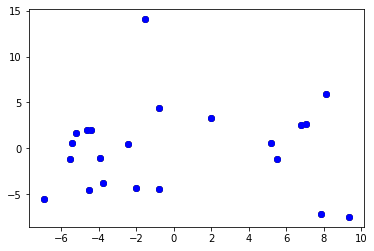

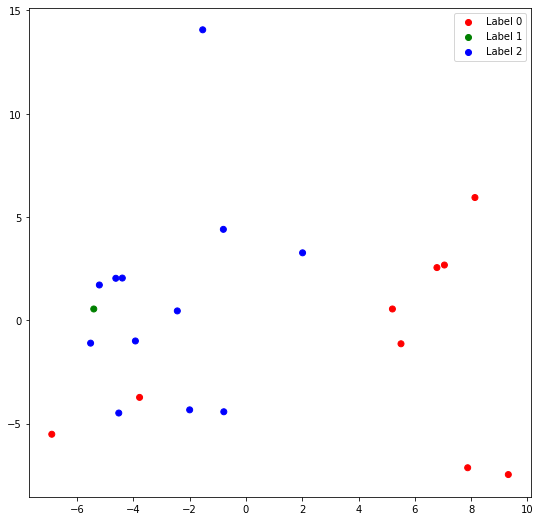

In [308]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["nb_pca_tw"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 

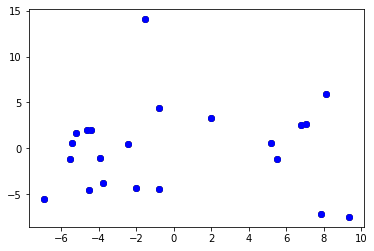

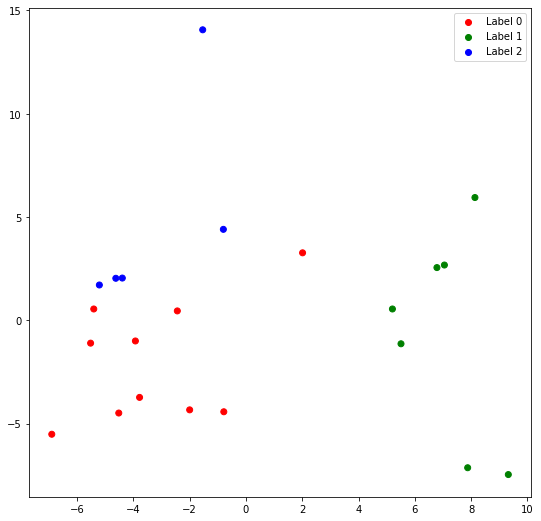

In [309]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_sph"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show()

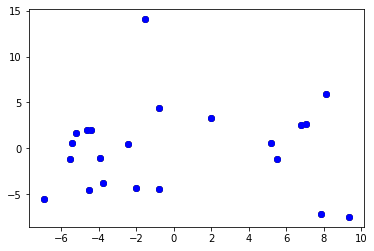

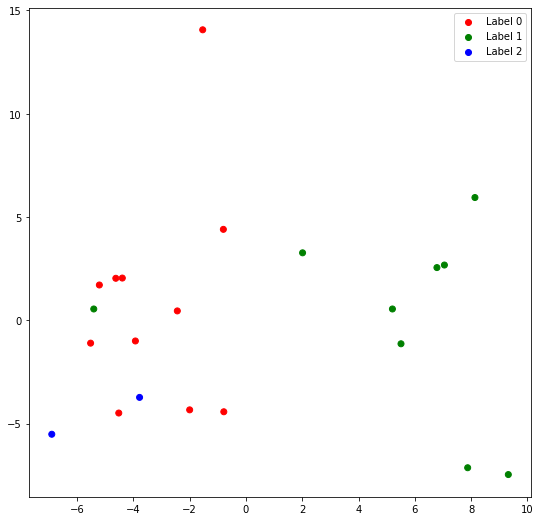

In [310]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_full"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 